# Math Background

***Dapeng Shang, BU Questrom***

#### Check Pytorch Installed

In [ ]:
import torch 
print(torch.__version__)

2.0.1


### Linear Model

1. DataSet
2. Model
3. Training
4. Inferring

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1, 2, 3]
y_data = [2, 4, 6]

def forward(x):
    return x*w

def loss(x, y):
    y_pred = forward(x)
    loss = (y-y_pred)**2
    return loss

w_list = []
mse_list = []

#using np.arange for float range
for w in np.arange(0.0, 4.1, 0.1):
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        l_sum += loss(x_val, y_val)
    # print('MSE=', l_sum/len(x_data))
    w_list.append(w)
    mse_list.append(l_sum/len(x_data))


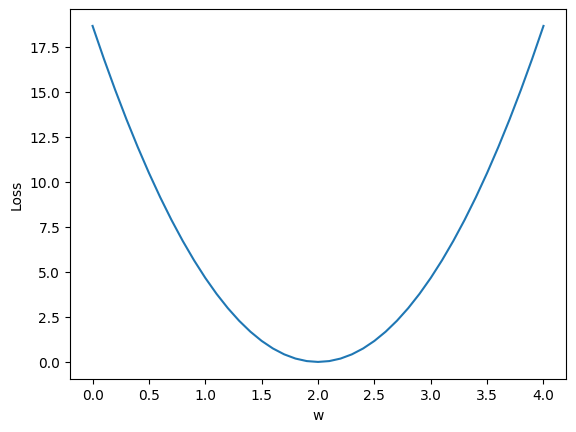

In deep learning, plot loss vs epoches, similar to this one
Using Visdom for real-time visualization


In [ ]:
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()
print('In deep learning, plot loss vs epoches, similar to this one')
print('Using Visdom for real-time visualization')

### Gradient Descent
 
 $w = w - \alpha \frac{\partial cost}{\partial w}$

 This is a greedy algo. When gradient > (<) 0, function increase along the gradient $\to$ take - gradient

 In deep learning, saddle points matters more, i.e. gradient = 0






For linear reg, 

$$ \frac{\partial cost}{\partial w} = \frac{\partial}{\partial w} \frac{1}{N}\sum_{n} (x_n\cdot w - y_n)^2 \\ 
= \frac{1}{N} \sum_{n} 2 \cdot x_n (x_n\cdot w - y_n)
$$

In [ ]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# inital guass
w = 1.0

def forward(x):
    return x*w

def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        loss = (y-y_pred)**2
        cost += loss
    return cost/len(xs)

def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        grad += 2* x*(y_pred -y)
    return grad/len(xs)

print('Predict (before training)', 4, forward(4))

loss_list = []

for epoch in range(100):
    cost_val = cost(x_data, y_data)
    grad_val = gradient(x_data, y_data)
    w -= 0.01 * grad_val
    loss_list.append(cost_val)
    
print('Predict (after training)', 4, forward(4))


Predict (before training) 4 4.0
Predict (after training) 4 7.999777758621207


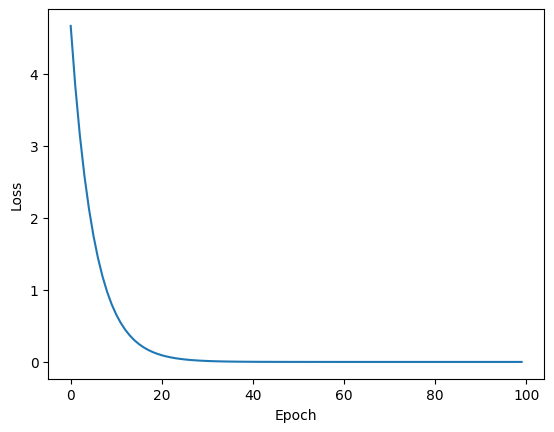

In [ ]:
plt.plot(np.arange(100), loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### SGD

Pick one sample's loss, instead of mean loss of total samples to update the weight $\to$ solving the saddle point due to randome noise of single sample.



In [ ]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# inital guass
w = 1.0

def forward(x):
    return x*w

def loss(x, y):
    y_pred = forward(x)
    loss = (y-y_pred)**2
    return loss

def gradient(x, y):
    y_pred = forward(x)
    grad = 2* x*(y_pred -y)
    return grad

print('Predict (before training)', 4, forward(4))

loss_list = []

for epoch in range(100):
    n = np.random.randint(len(x_data))
    x, y= list(zip(x_data, y_data))[n]
    grad = gradient(x, y)
    w -= 0.01 * grad
    loss_list.append(loss(x, y))
    
print('Predict (after training)', 4, forward(4))

Predict (before training) 4 4.0
Predict (after training) 4 7.999865905565167


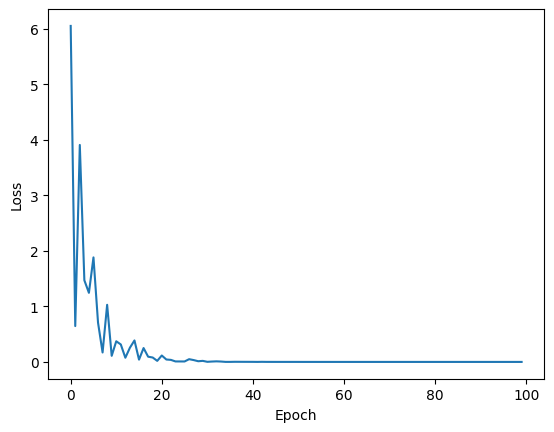

In [ ]:
plt.plot(np.arange(100), loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

SDG v.s. Gradient Descent

Gradient Descent: could para computing, but cannot handle saddle points

SDG:  can handle saddle points, but cannot parallel computing as updated weights depends on the random points last time picked

Sol: mini-batch $\to$ using small group of samples instead of single sample like SDG

### Back Propagation

In [ ]:
import torch

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w= torch.tensor([1.0])
w.requires_grad = True


In [ ]:
def forward(x):
# As w is tensor, x tansfer into tensor automatically
    return x * w

def loss(x, y):
    y_pred = forward(x)
    loss = (y-y_pred)**2
    return loss
#.item() turn a tensor to a scalar
print('Predict (before training)', 4, forward(4).item())

for epoch in range(100):
    n = np.random.randint(len(x_data))
    x, y= list(zip(x_data, y_data))[n]
    # Forward: compute the loss, create computional graph
    l = loss(x, y)
    # Backward: release computational graph
    l.backward()

    print('\tgrad:',x,y, w.grad.item())
    # w.grad is also a tensor
    w.data = w.data - 0.01*w.grad.data

    # Grad coumputed by .backward() will be accumalted
    # After updated, remember set the grad to zero
    w.grad.data.zero_()
    
    print('progress:', epoch, l.item())

print('Predict (after training)', 4, forward(4).item())

     

Predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
progress: 0 1.0
	grad: 3.0 6.0 -17.639999389648438
progress: 1 8.643600463867188
	grad: 2.0 4.0 -6.428800582885742
progress: 2 2.583092212677002
	grad: 3.0 6.0 -13.307616233825684
progress: 3 4.919240474700928
	grad: 2.0 4.0 -4.849886894226074
progress: 4 1.4700876474380493
	grad: 1.0 2.0 -1.115473985671997
progress: 5 0.3110705614089966
	grad: 3.0 6.0 -9.838479995727539
progress: 6 2.6887691020965576
	grad: 2.0 4.0 -3.5855789184570312
progress: 7 0.8035235404968262
	grad: 1.0 2.0 -0.8246831893920898
progress: 8 0.17002558708190918
	grad: 1.0 2.0 -0.8081896305084229
progress: 9 0.16329261660575867
	grad: 1.0 2.0 -0.7920258045196533
progress: 10 0.1568262130022049
	grad: 2.0 4.0 -3.104741096496582
progress: 11 0.6024636030197144
	grad: 2.0 4.0 -2.8563613891601562
progress: 12 0.5099250078201294
	grad: 2.0 4.0 -2.627852439880371
progress: 13 0.43160054087638855
	grad: 3.0 6.0 -5.439654350280762
progress: 14 0.821940004825592
	grad: 2.0 

#### Quadratic model

In [ ]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w= torch.tensor([1.0, 1.0])
w.requires_grad = True

In [ ]:
def forward(x):
# create w1*x^2 + w2*x
    return x**2  * w[0] + x*w[1]

def loss(x, y):
    y_pred = forward(x)
    loss = (y-y_pred)**2
    return loss

print('Predict (before training)', 4, forward(4).item())

for epoch in range(100):
    # Using all the data, instead of one random point for traning
    for x, y in zip(x_data, y_data):
        # Forward: compute the loss, create computional graph
        l = loss(x, y)
        # Backward: release computational graph
        l.backward()

        print('\tgrad:',x,y, w.grad.data)
        # adjust learning rate for covergence
        w.data = w.data - 0.02*w.grad.data

        w.grad.data.zero_()
        
    print('progress:', epoch, l.item())

print('Predict (after training)', 4, forward(4).item(), w.data)

Predict (before training) 4 20.0
	grad: 1.0 2.0 tensor([0., 0.])
	grad: 2.0 4.0 tensor([16.,  8.])
	grad: 3.0 6.0 tensor([47.5200, 15.8400])
progress: 0 6.969596862792969
	grad: 1.0 2.0 tensor([-3.4944, -3.4944])
	grad: 2.0 4.0 tensor([-28.9270, -14.4635])
	grad: 3.0 6.0 tensor([0.8878, 0.2959])
progress: 1 0.00243257824331522
	grad: 1.0 2.0 tensor([-1.5266, -1.5266])
	grad: 2.0 4.0 tensor([-4.9828, -2.4914])
	grad: 3.0 6.0 tensor([23.1214,  7.7071])
progress: 2 1.6499981880187988
	grad: 1.0 2.0 tensor([-2.3386, -2.3386])
	grad: 2.0 4.0 tensor([-16.0155,  -8.0077])
	grad: 3.0 6.0 tensor([10.5256,  3.5085])
progress: 3 0.34194058179855347
	grad: 1.0 2.0 tensor([-1.7520, -1.7520])
	grad: 2.0 4.0 tensor([-9.3803, -4.6902])
	grad: 3.0 6.0 tensor([15.6596,  5.2199])
progress: 4 0.7568566799163818
	grad: 1.0 2.0 tensor([-1.8842, -1.8842])
	grad: 2.0 4.0 tensor([-11.7597,  -5.8799])
	grad: 3.0 6.0 tensor([11.8765,  3.9588])
progress: 5 0.4353468120098114
	grad: 1.0 2.0 tensor([-1.6613, -1.661